## 1. Data Understanding

In [37]:
import pandas as pd

In [74]:
df = pd.read_csv("regression.csv")
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [39]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [40]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())
    

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

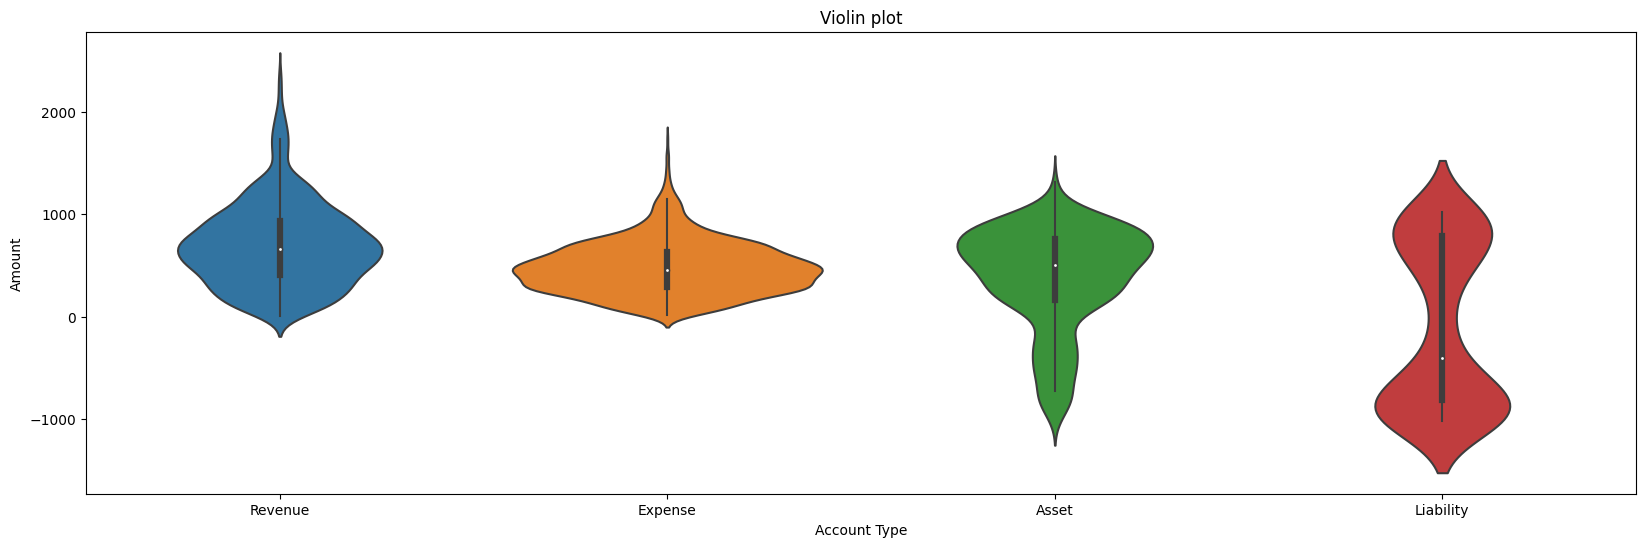

In [42]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Account Type", y="Amount", data=df).set_title("Violin plot")
plt.show()

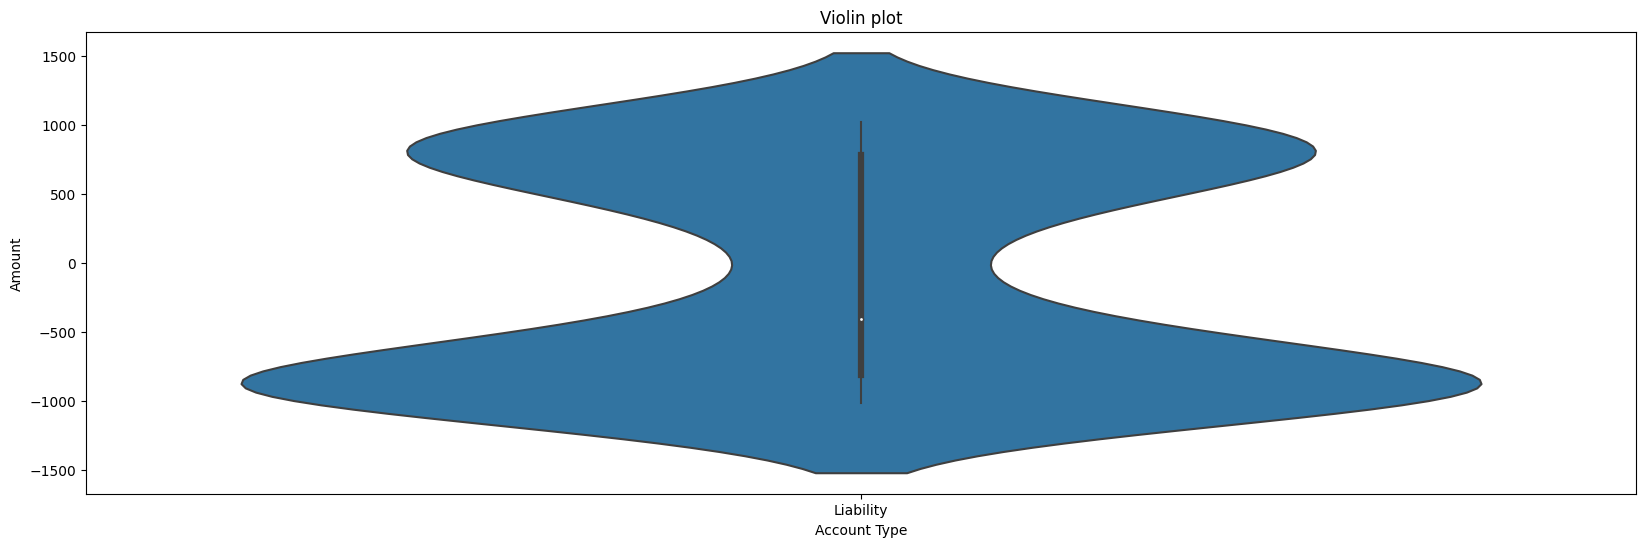

In [43]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Account Type", y="Amount", data=df[df["Account Type"]=="Liability"]).set_title("Violin plot")
plt.show()

In [44]:
df['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [45]:
month = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}

In [46]:
df['Period'] = df['Month'].apply(lambda x: month[x])

In [47]:
df['Day'] = 1

In [48]:
df["Date"] = df['Year'].astype('str') + "-" + df['Period'].astype('str') + "-" + df['Day'].astype('str')

In [49]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 4212 non-null   int64         
 1   Month                4212 non-null   object        
 2   Cost Centre          4212 non-null   object        
 3   Account              4212 non-null   int64         
 4   Account Description  4212 non-null   object        
 5   Account Type         4212 non-null   object        
 6   Amount               4212 non-null   float64       
 7   Period               4212 non-null   int64         
 8   Day                  4212 non-null   int64         
 9   Date                 4212 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 329.2+ KB


<AxesSubplot:xlabel='Date', ylabel='Amount'>

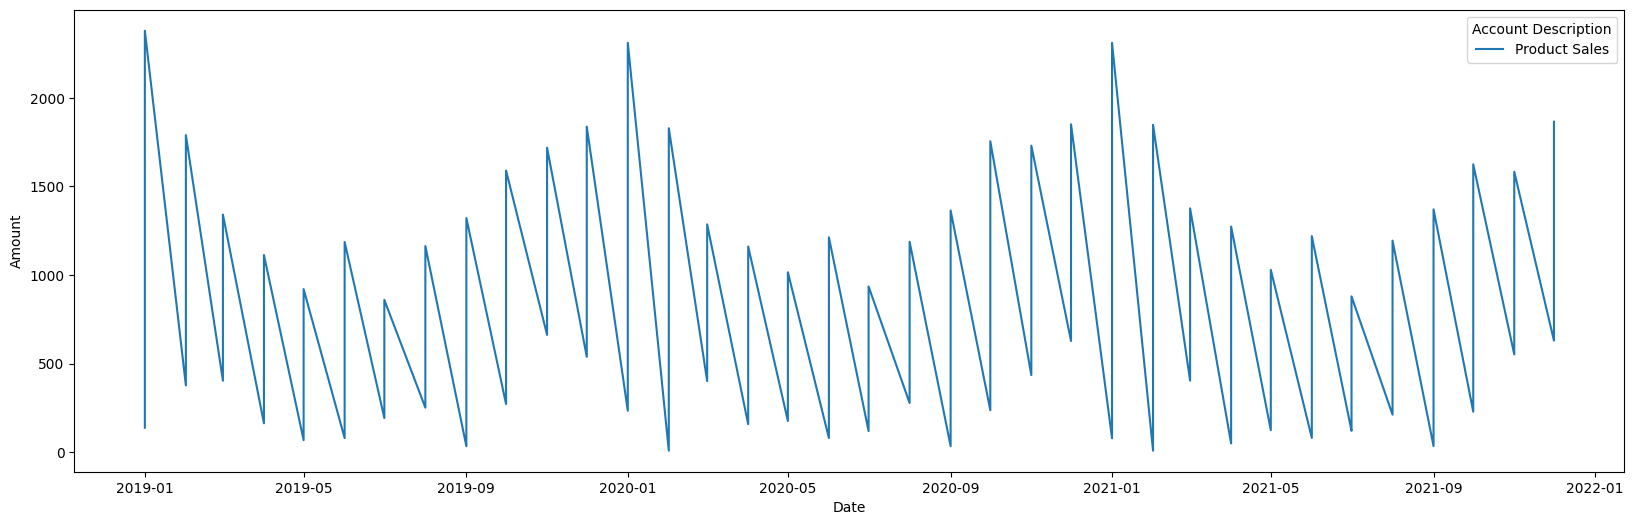

In [50]:
plt.figure(figsize=(20,6))
sns.lineplot(x="Date", y="Amount", hue= "Account Description", estimator=None, data=df[df['Account Description']=="Product Sales"])

In [51]:
df.corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [52]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001], dtype=int64)

In [53]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
corrdict = {}

for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):(row['Amount'])}

In [55]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [56]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


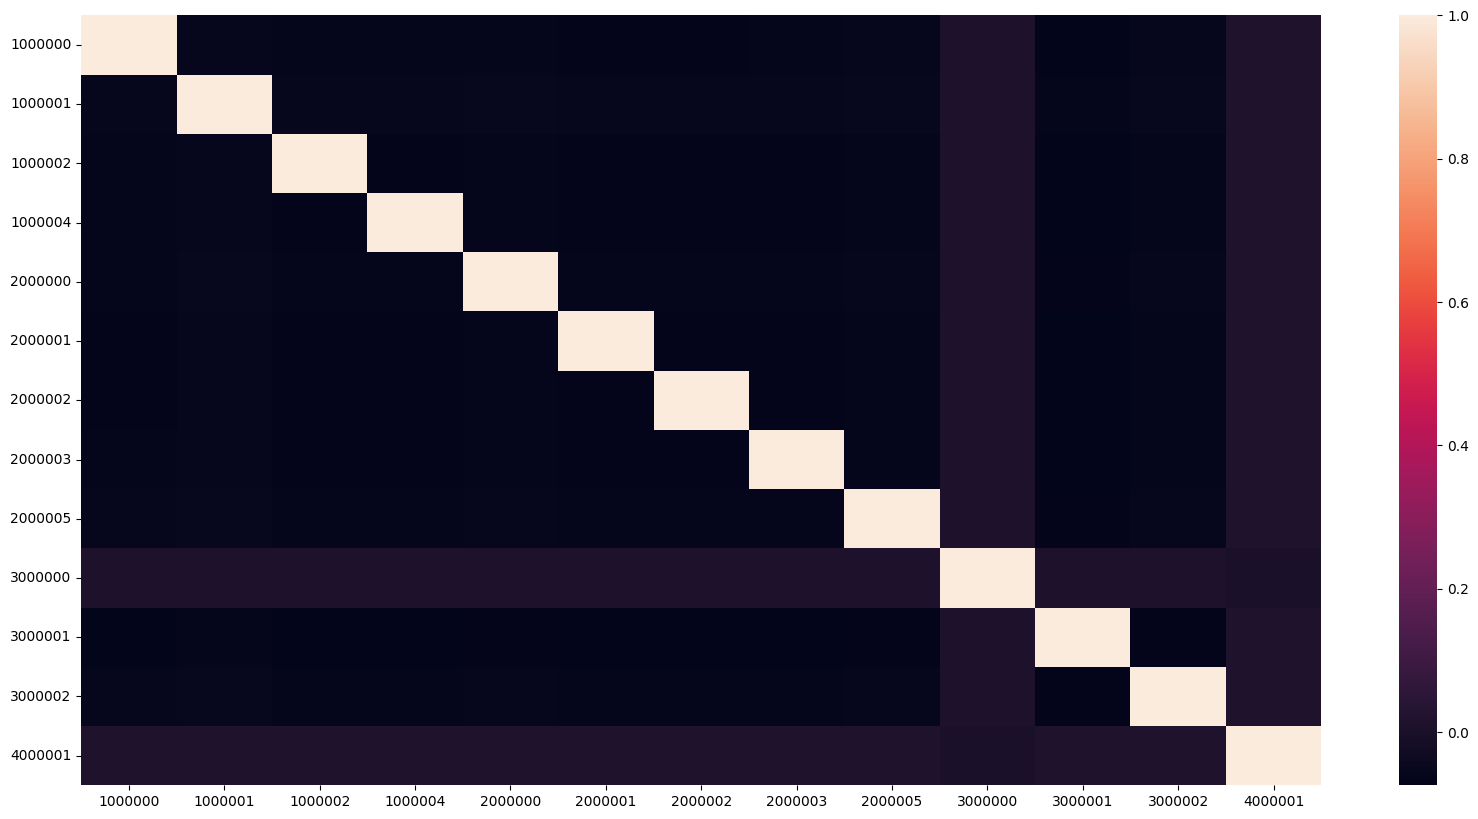

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(corrdf.corr())
plt.show()

## 2. Data Preparation

In [58]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 4212 non-null   int64         
 1   Month                4212 non-null   object        
 2   Cost Centre          4212 non-null   object        
 3   Account              4212 non-null   int64         
 4   Account Description  4212 non-null   object        
 5   Account Type         4212 non-null   object        
 6   Amount               4212 non-null   float64       
 7   Period               4212 non-null   int64         
 8   Day                  4212 non-null   int64         
 9   Date                 4212 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 329.2+ KB


In [60]:
df['Year'] = df['Year'].astype('str')
df['Account'] = df['Account'].astype('str')

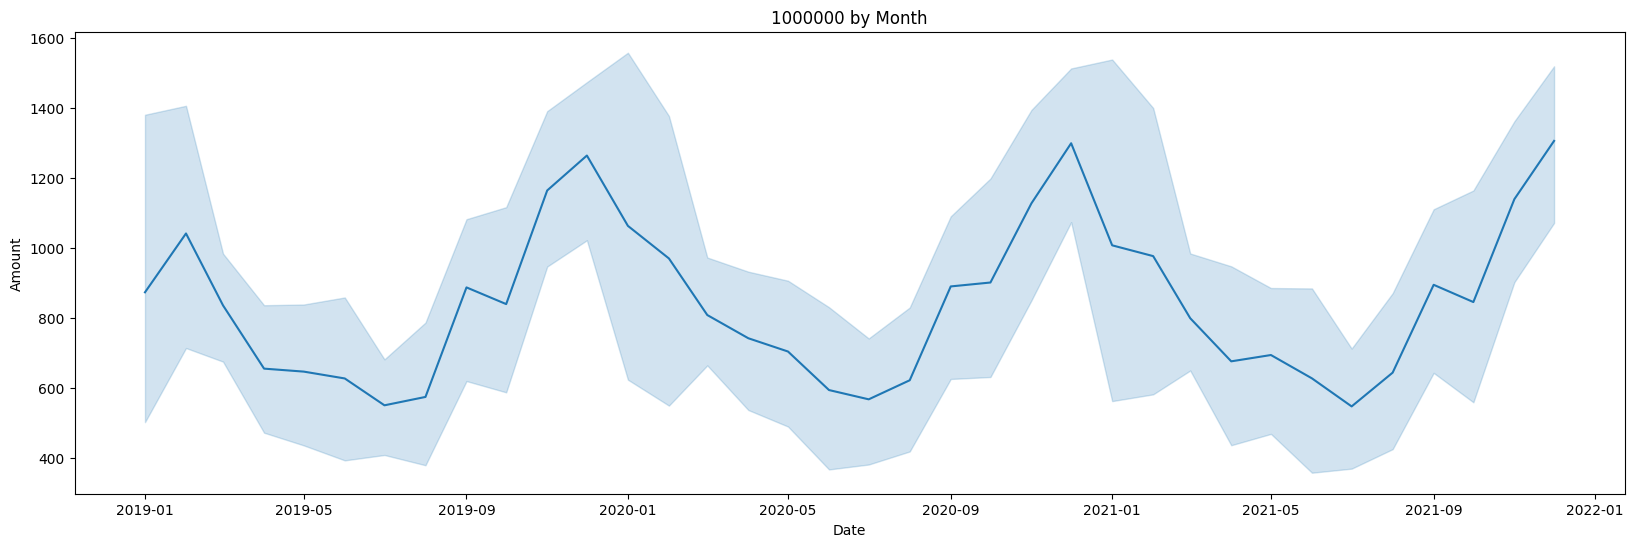

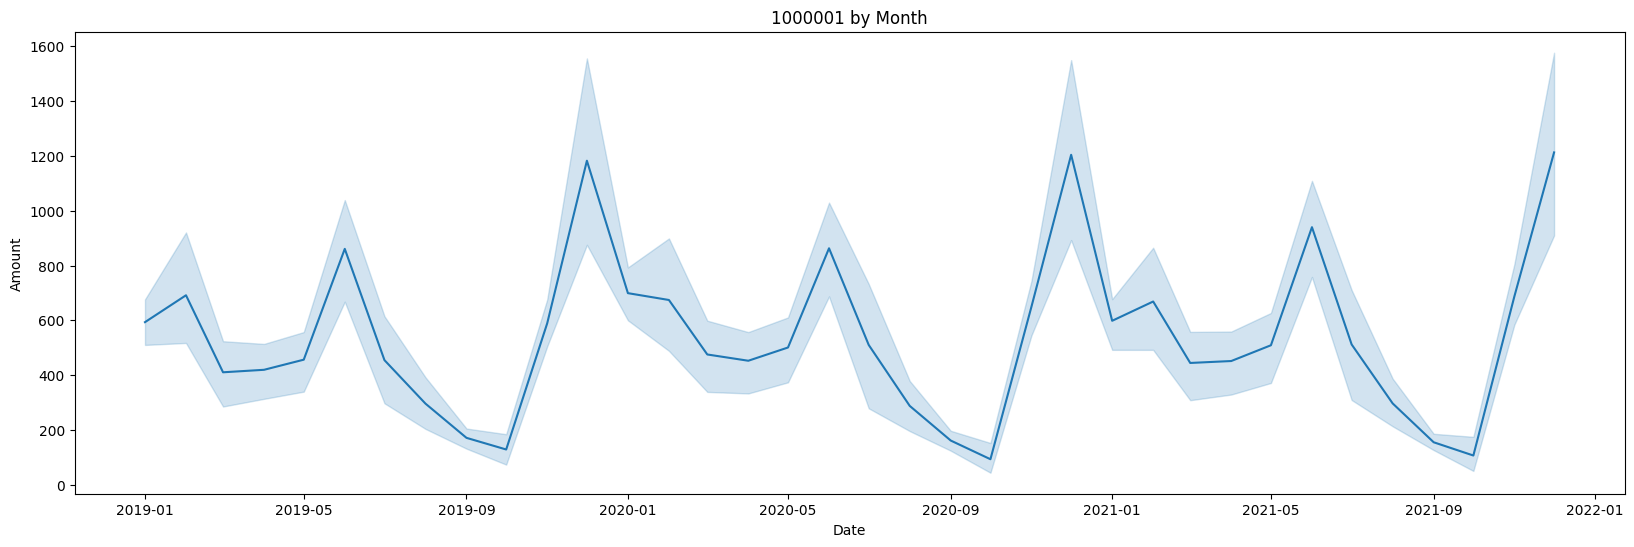

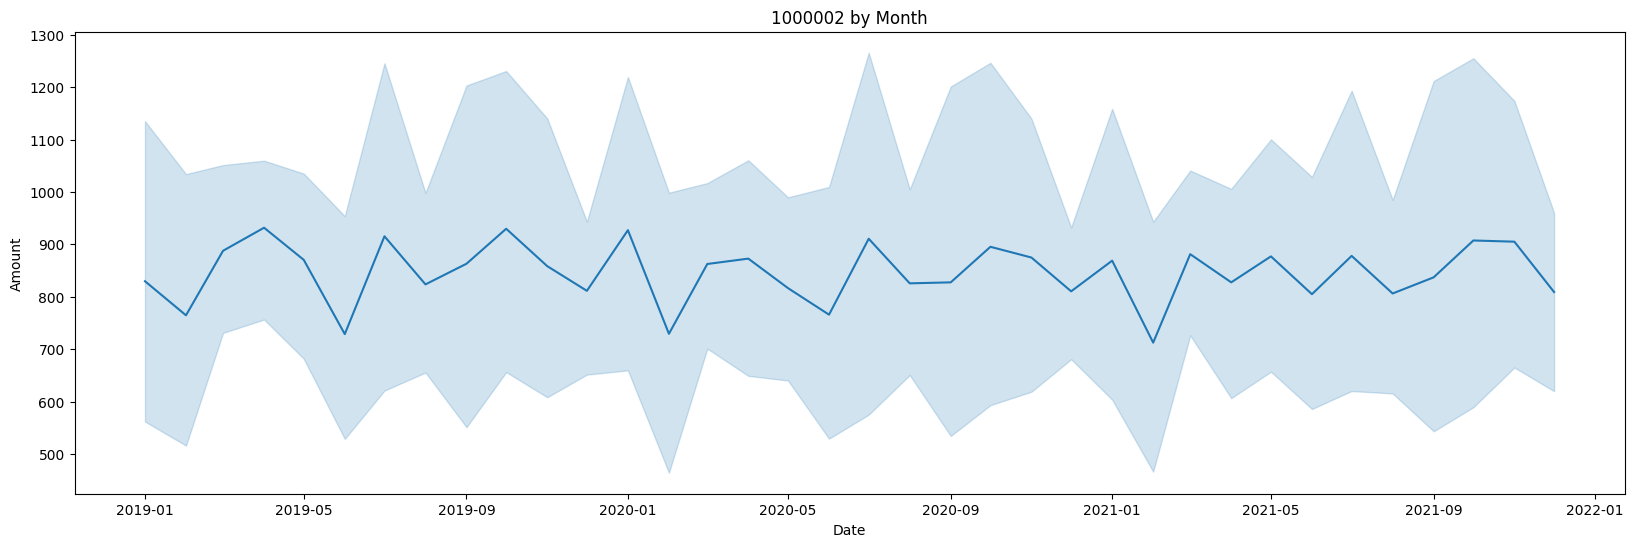

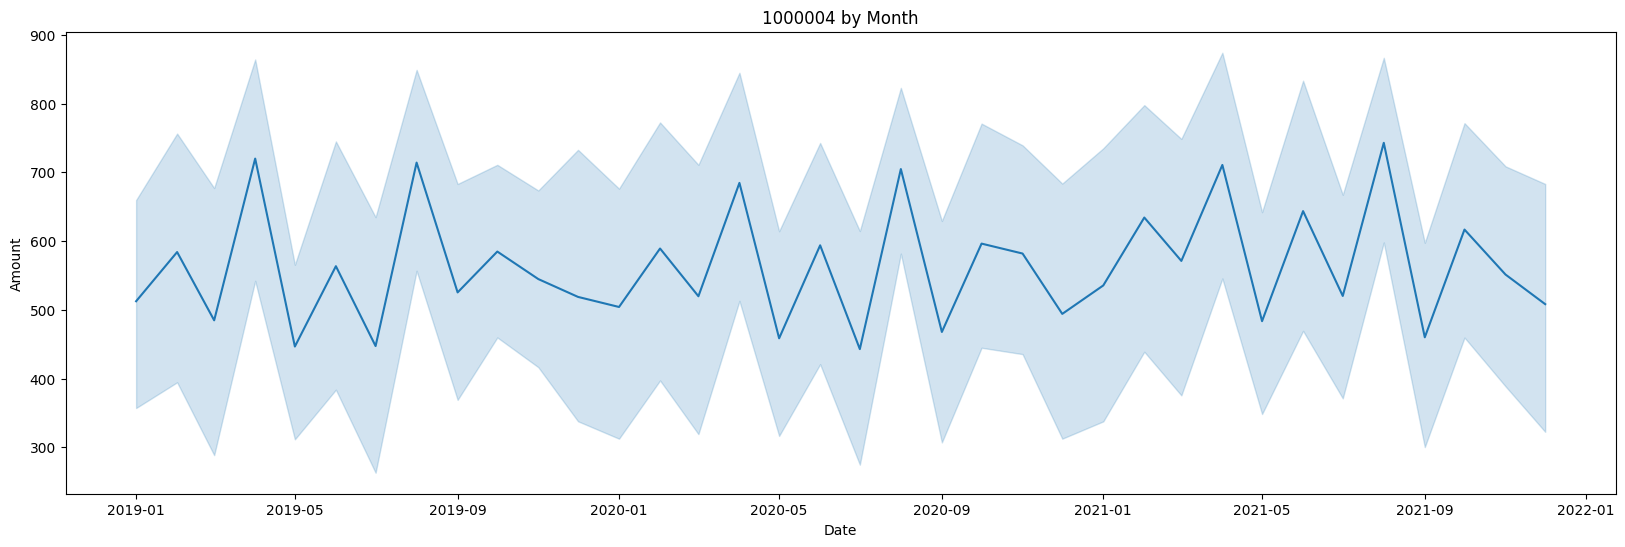

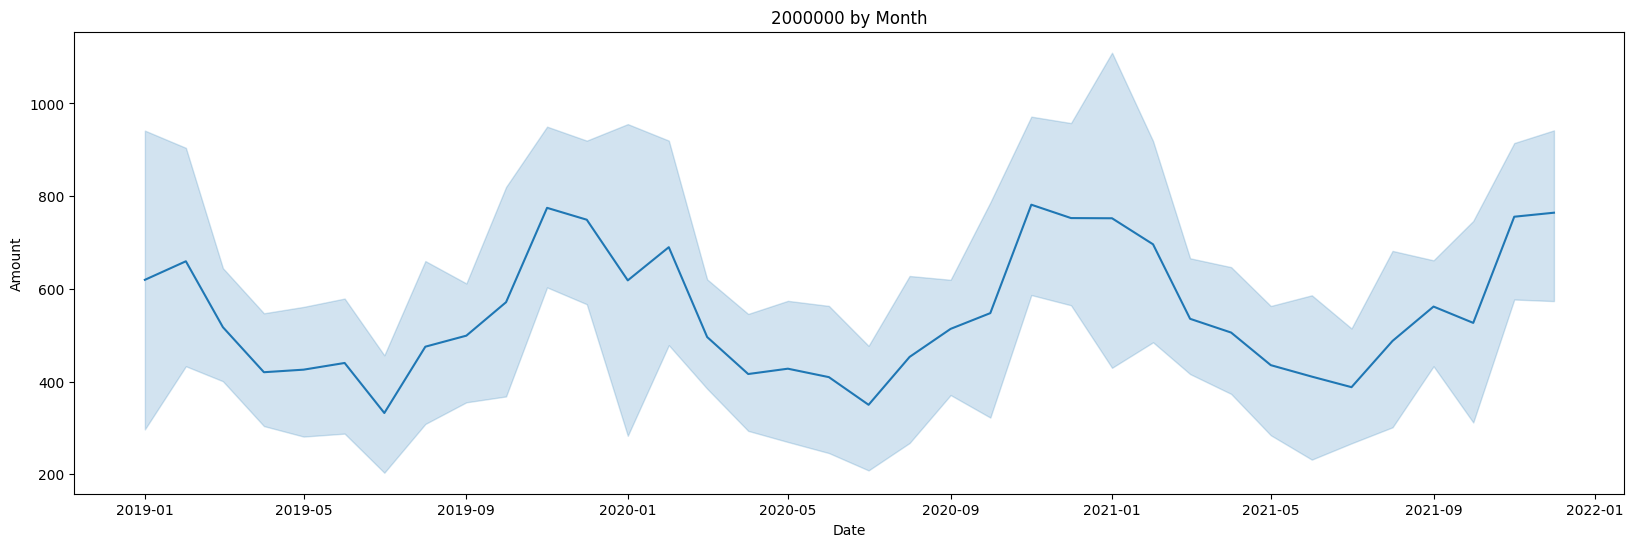

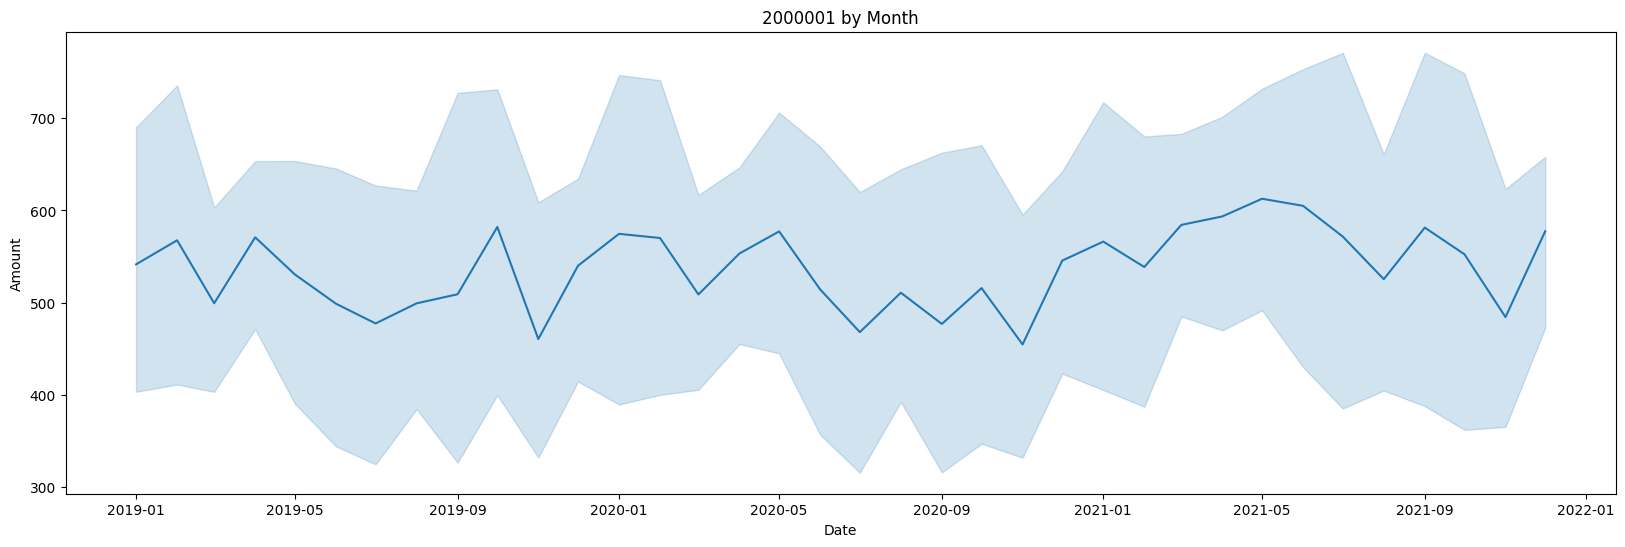

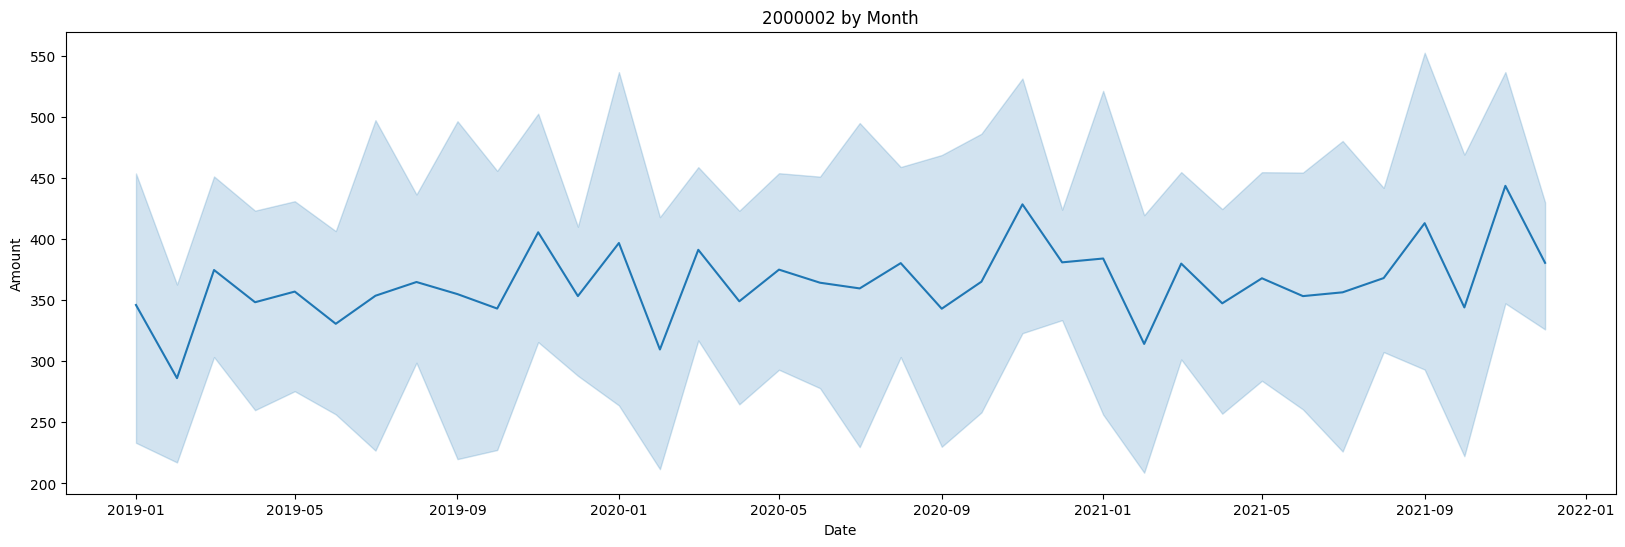

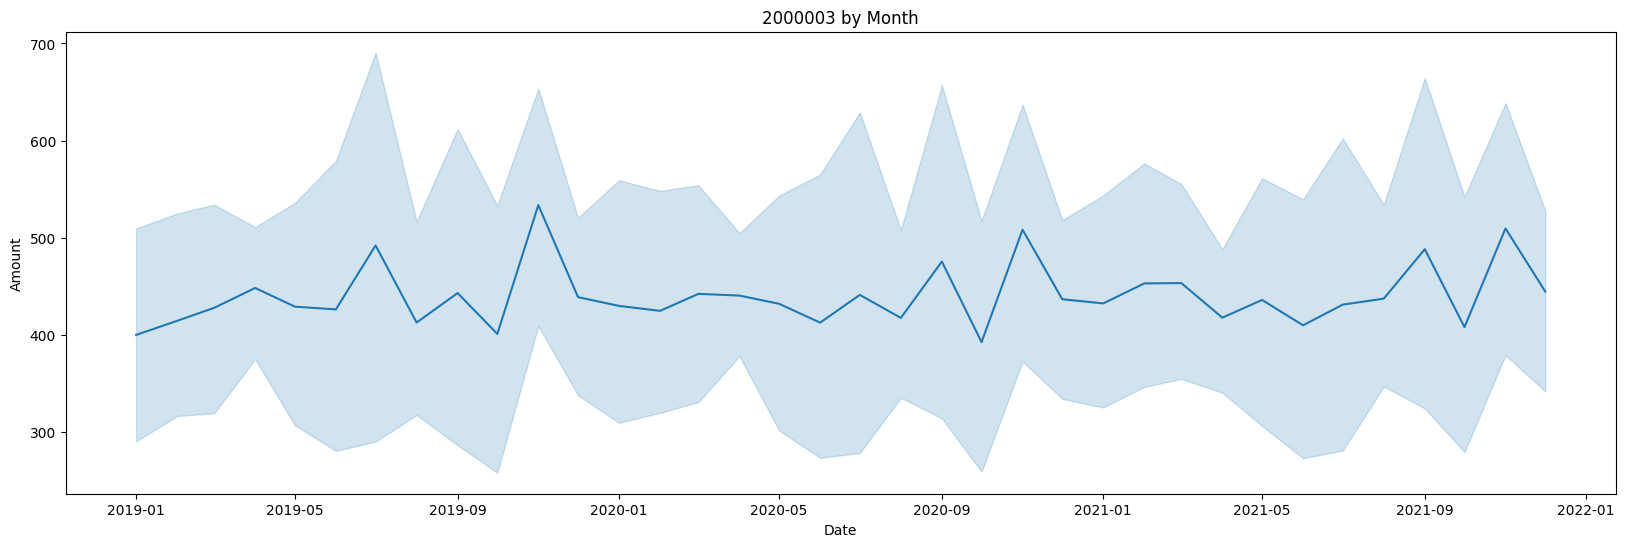

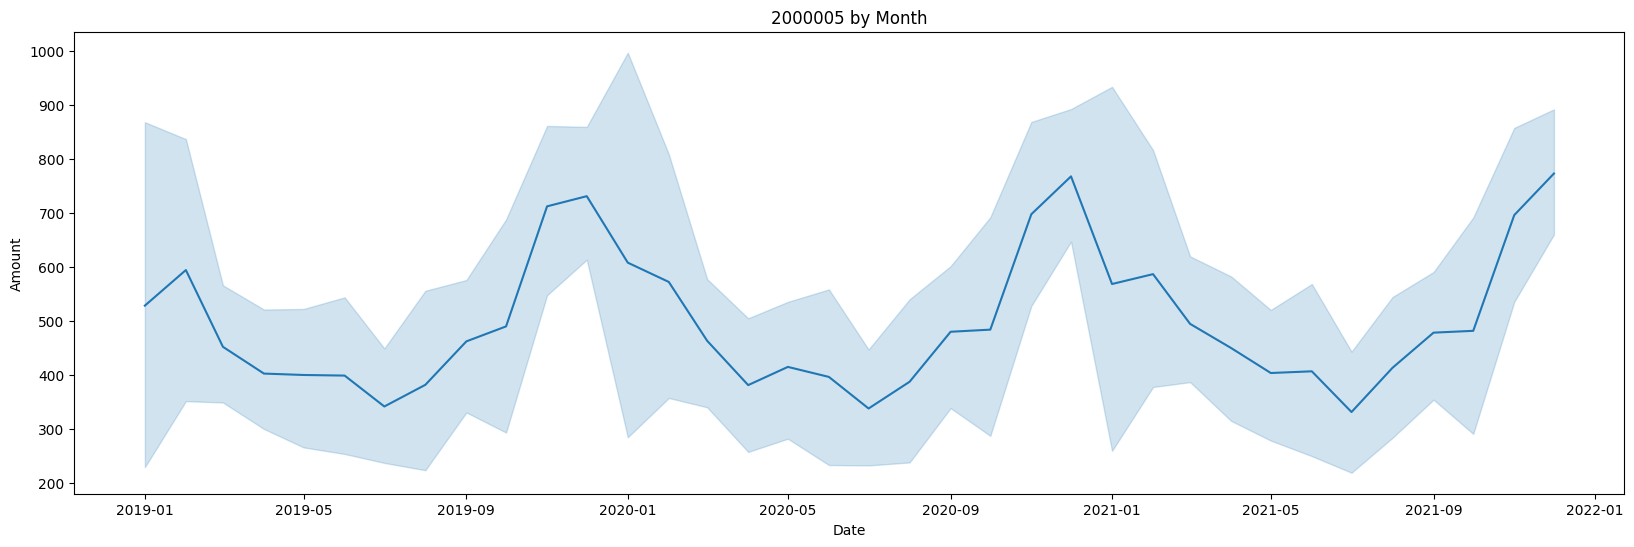

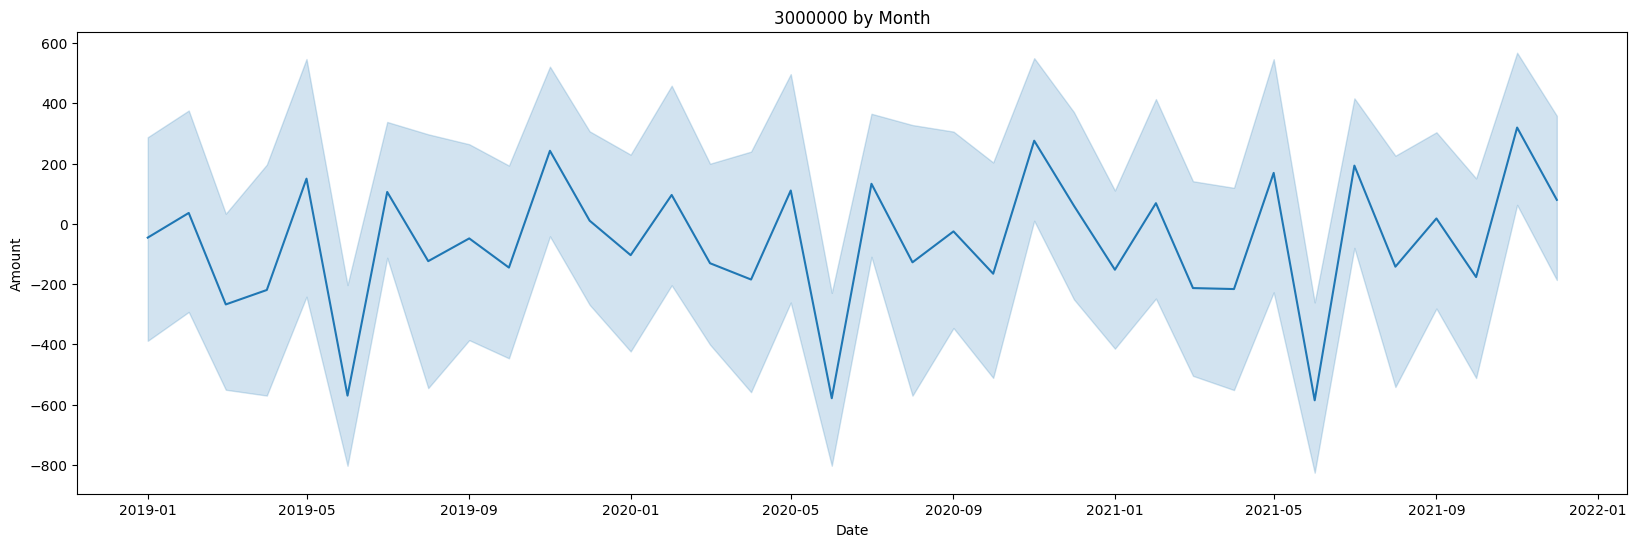

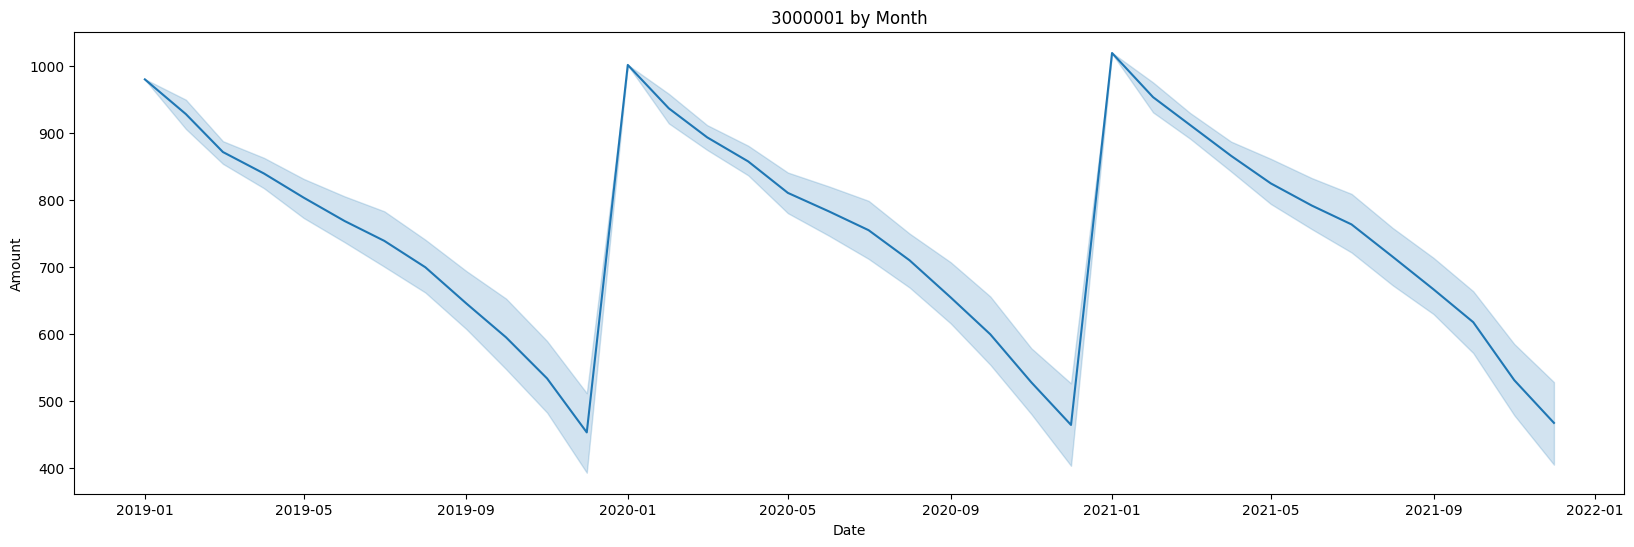

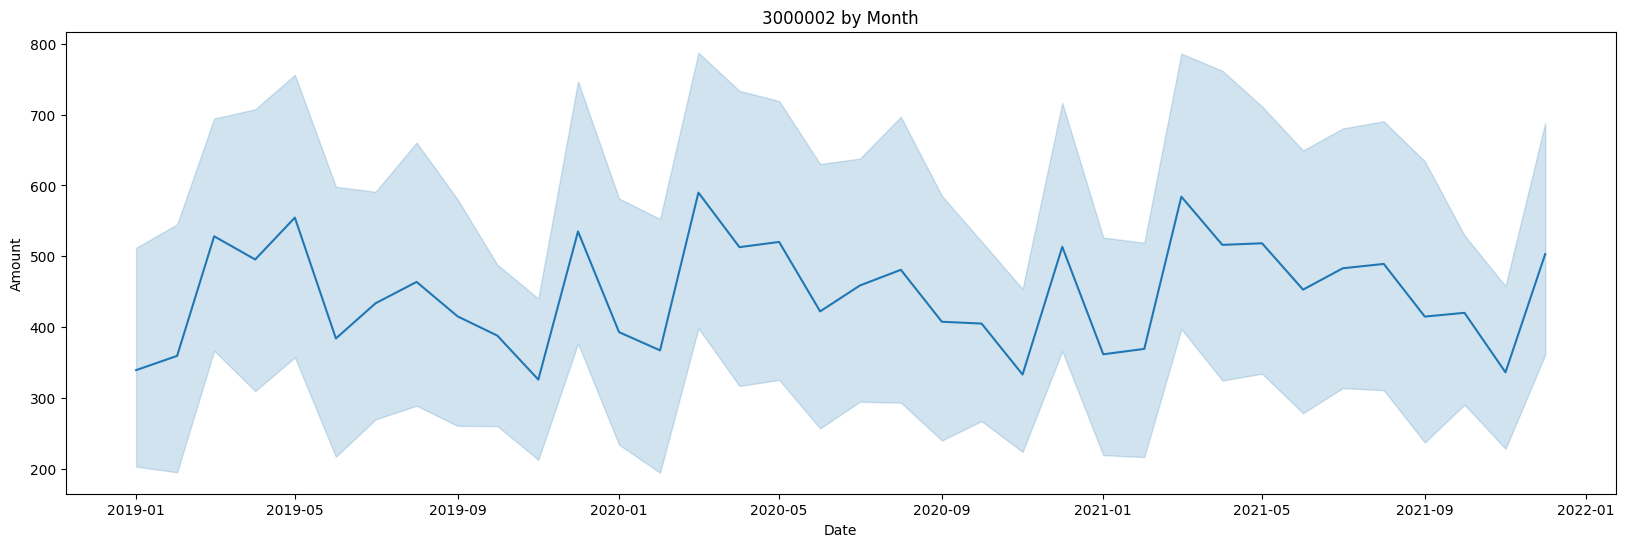

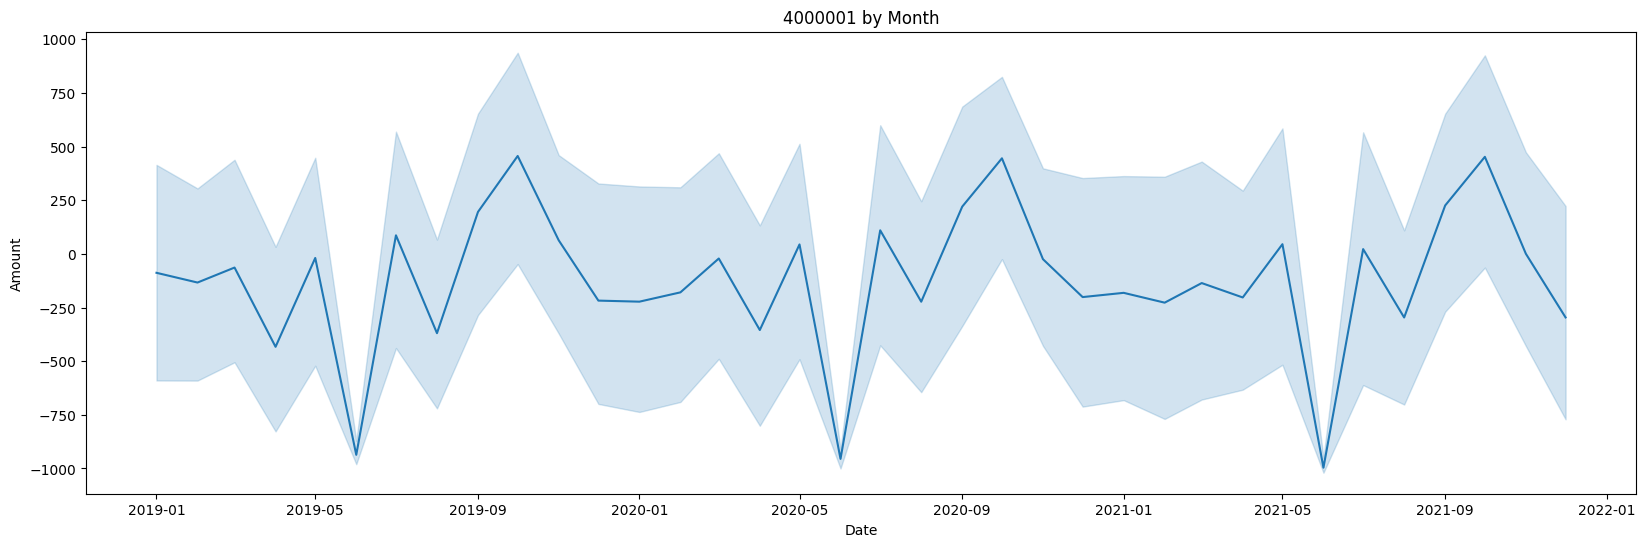

In [61]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

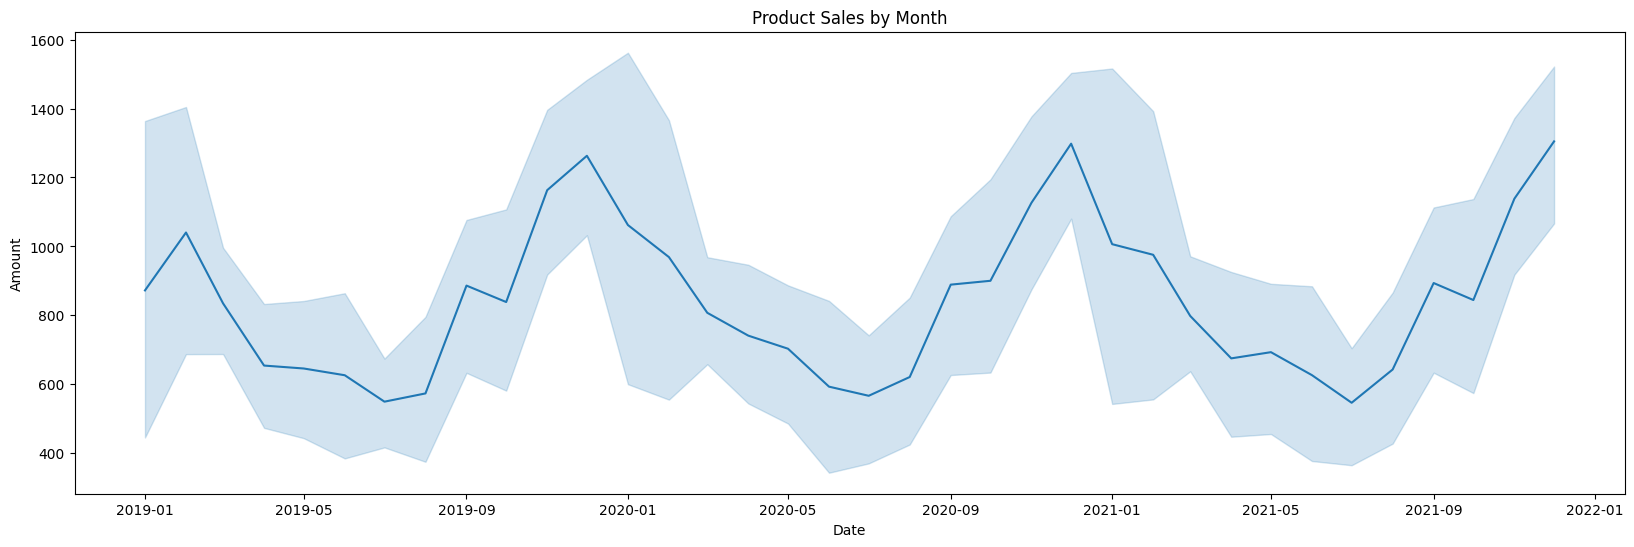

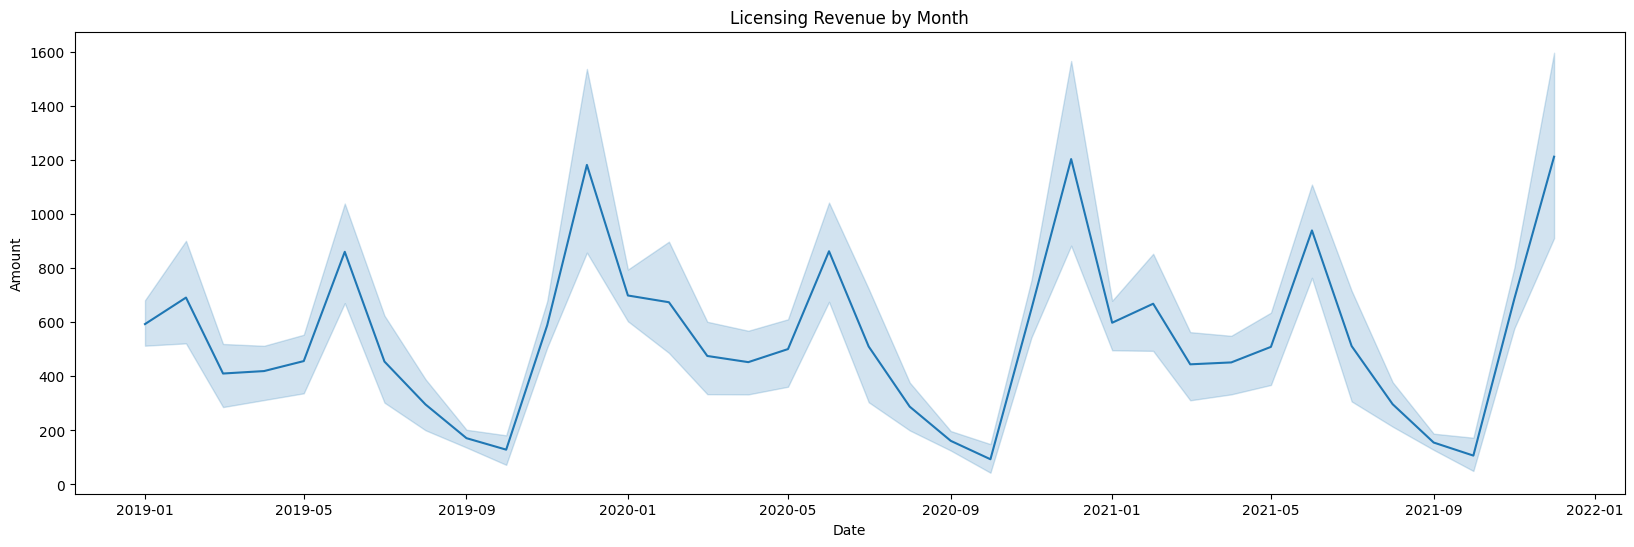

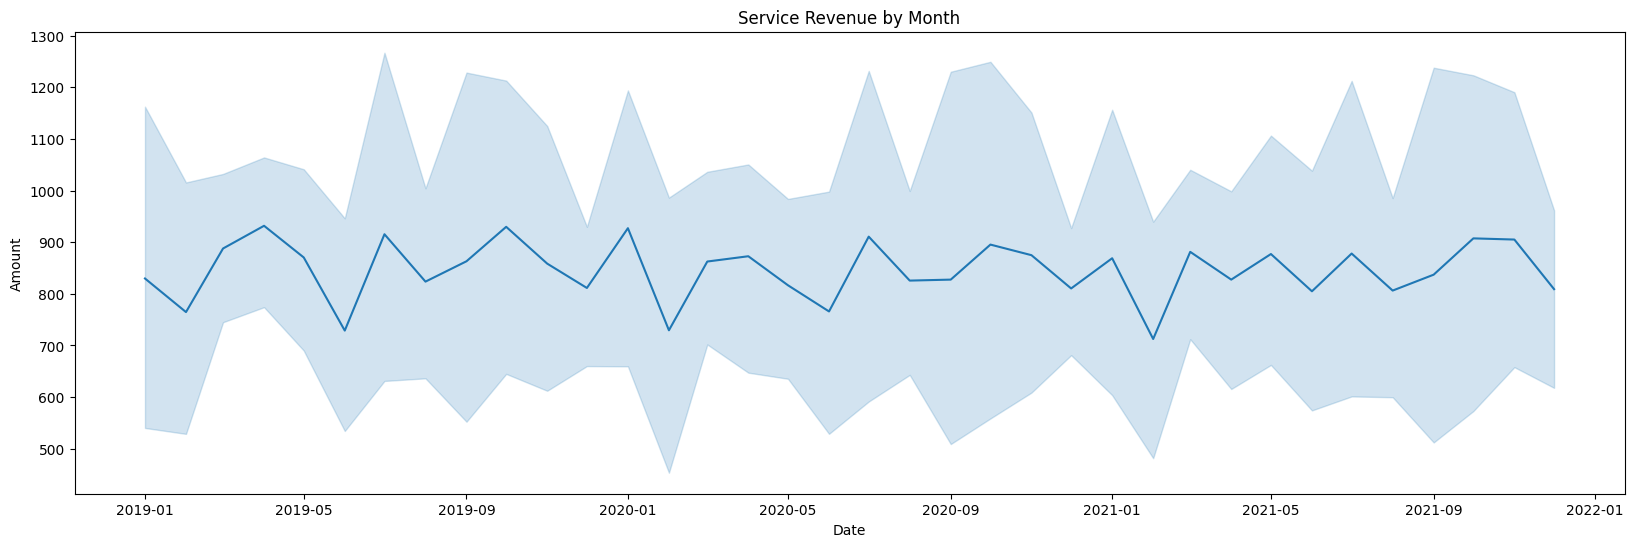

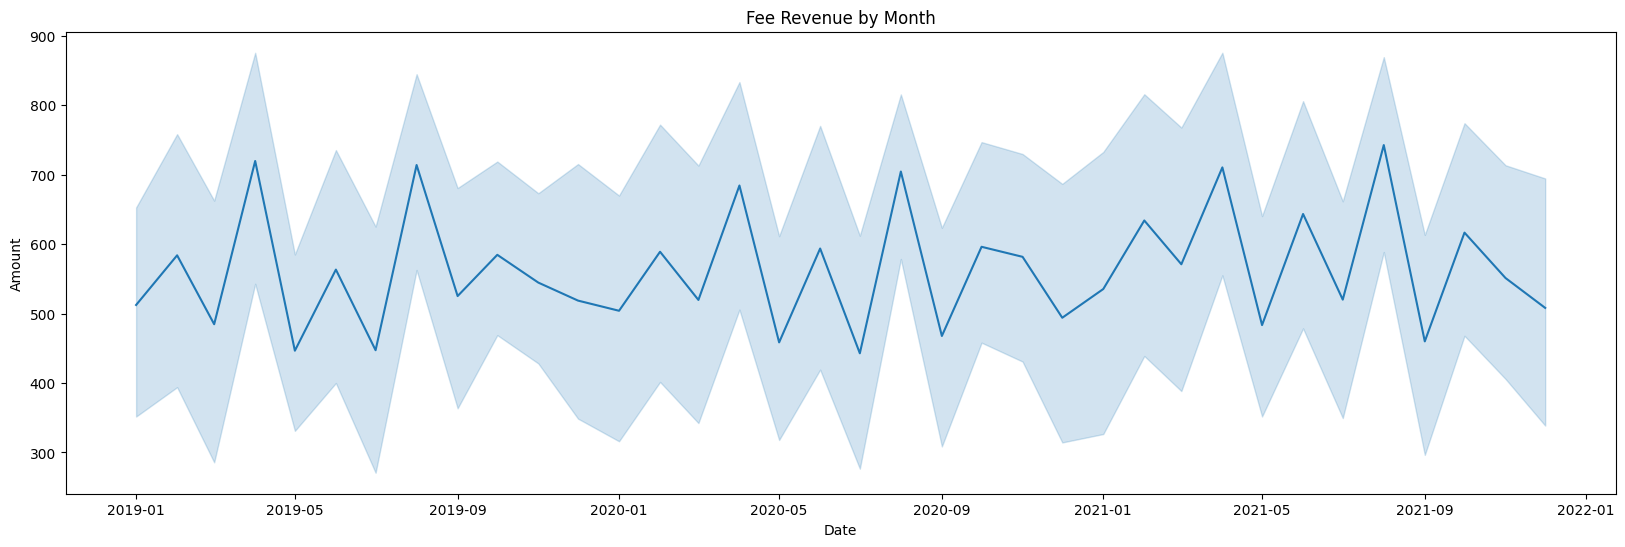

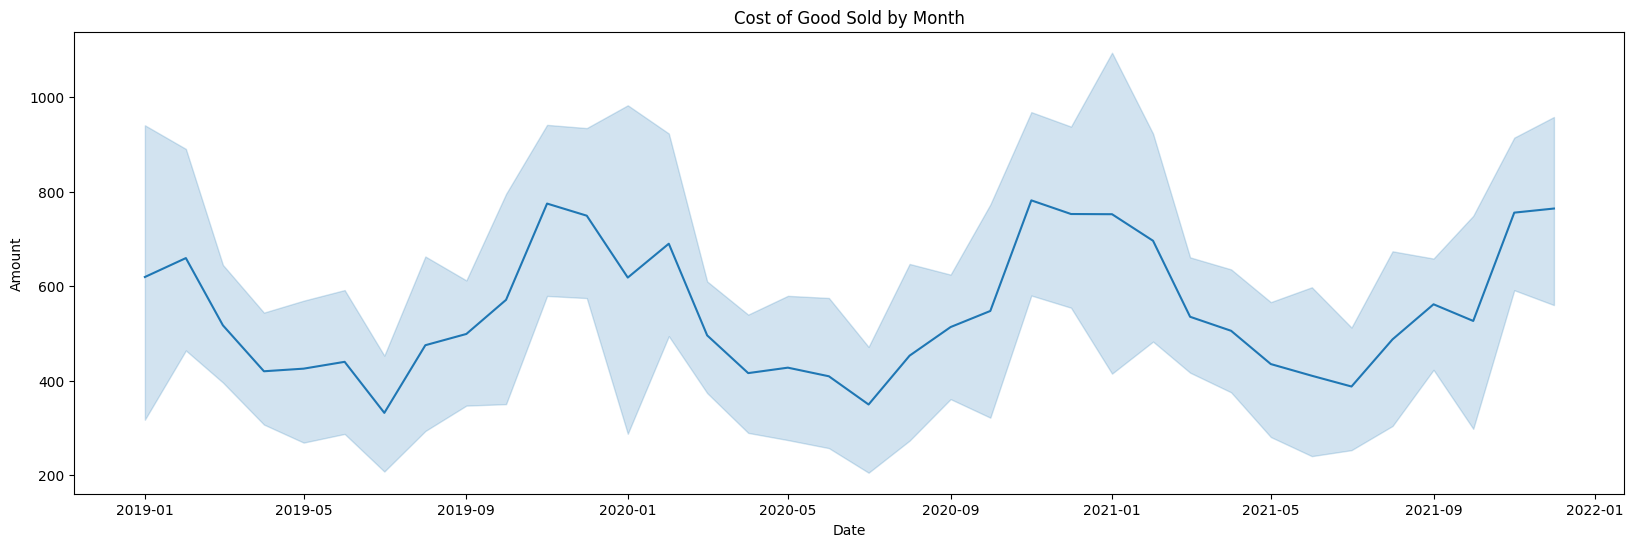

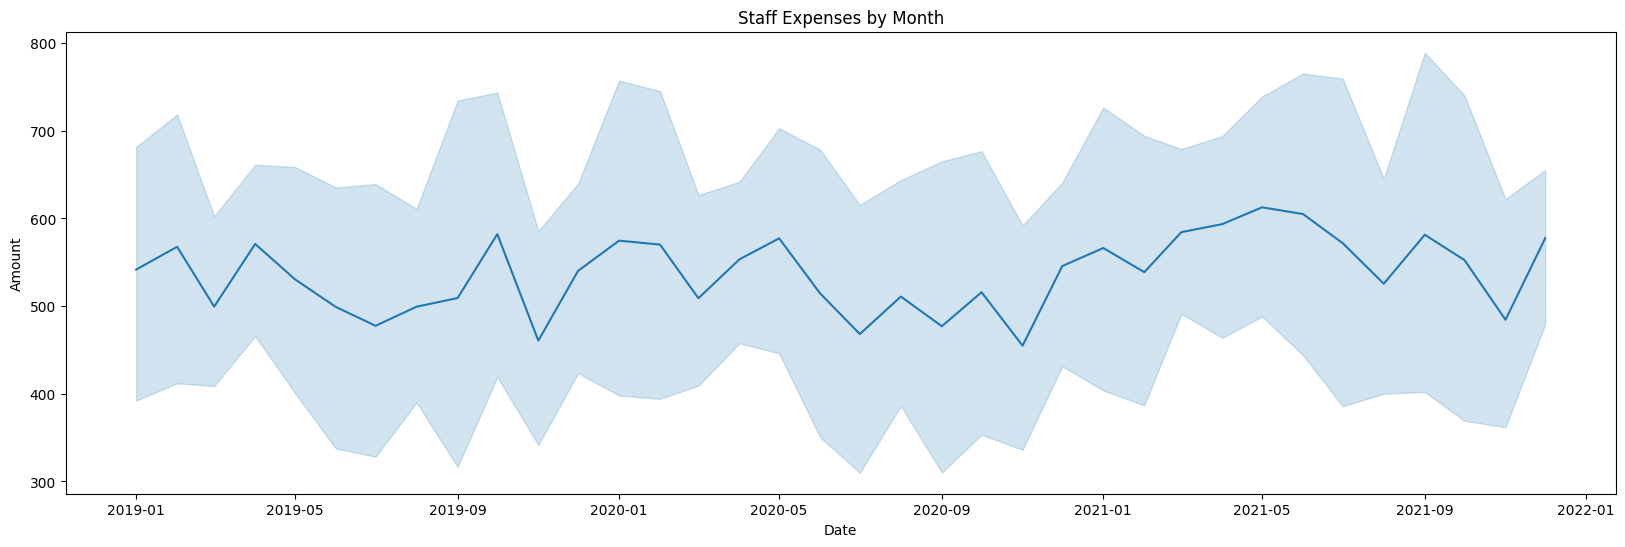

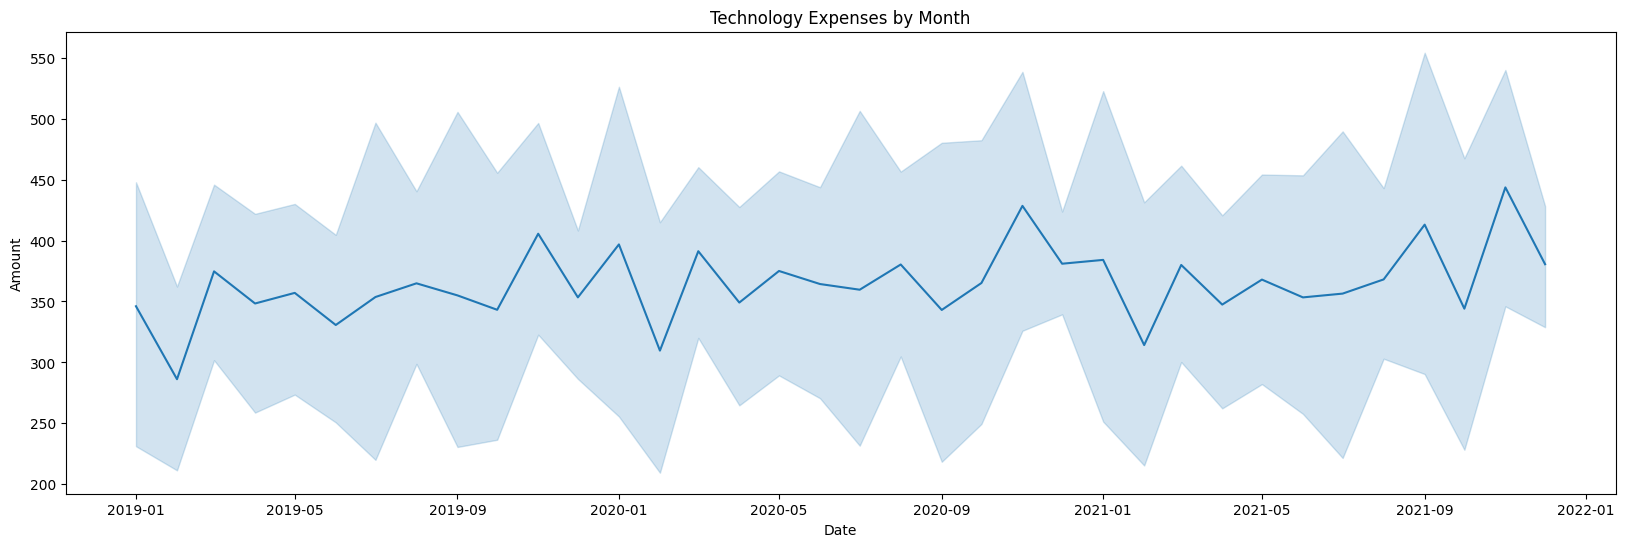

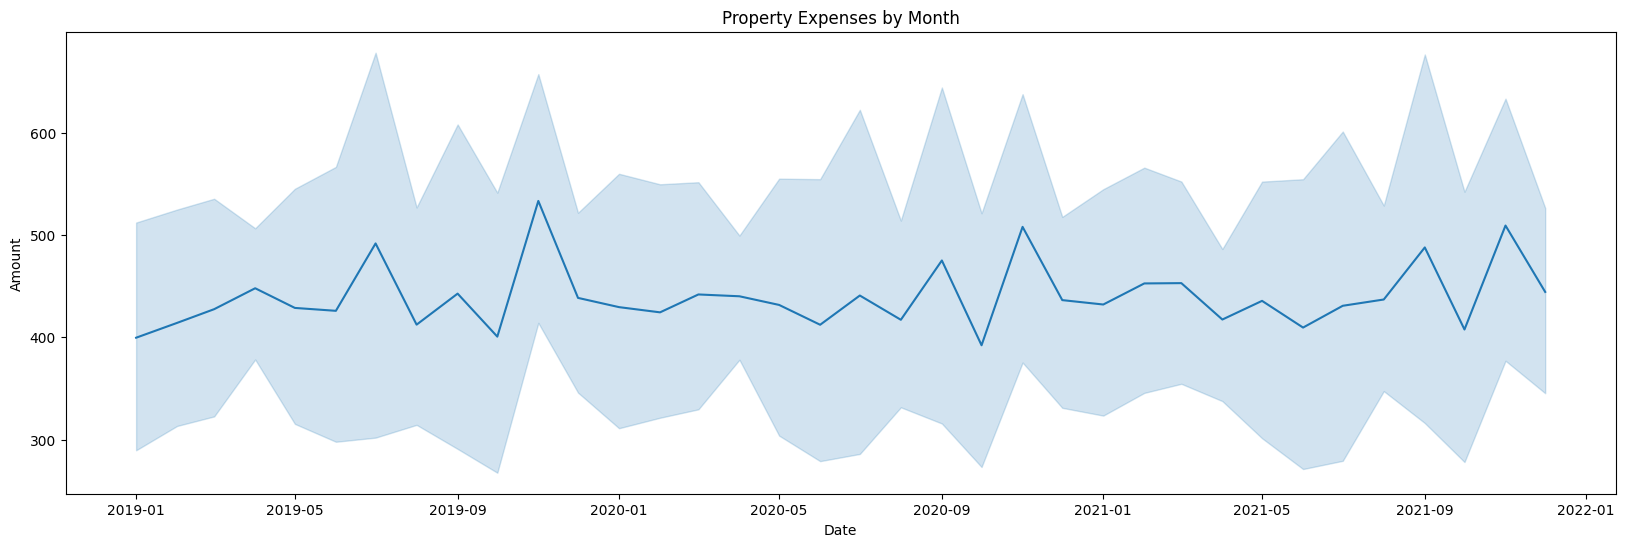

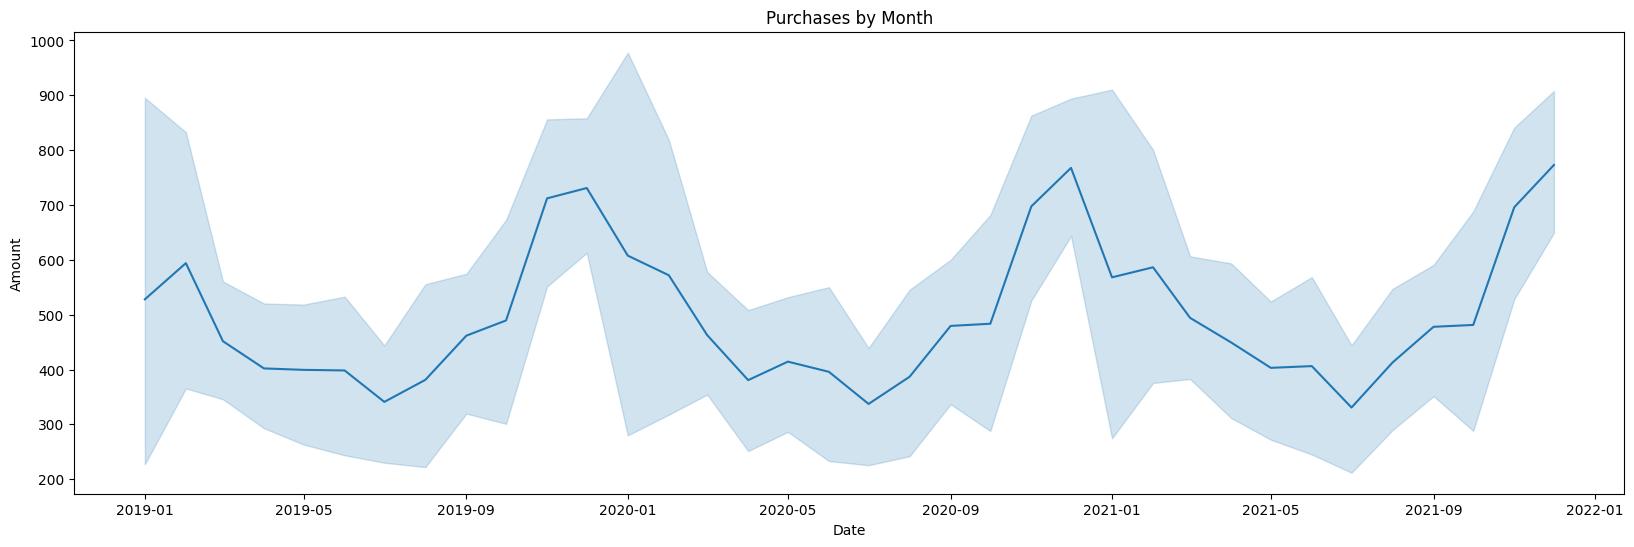

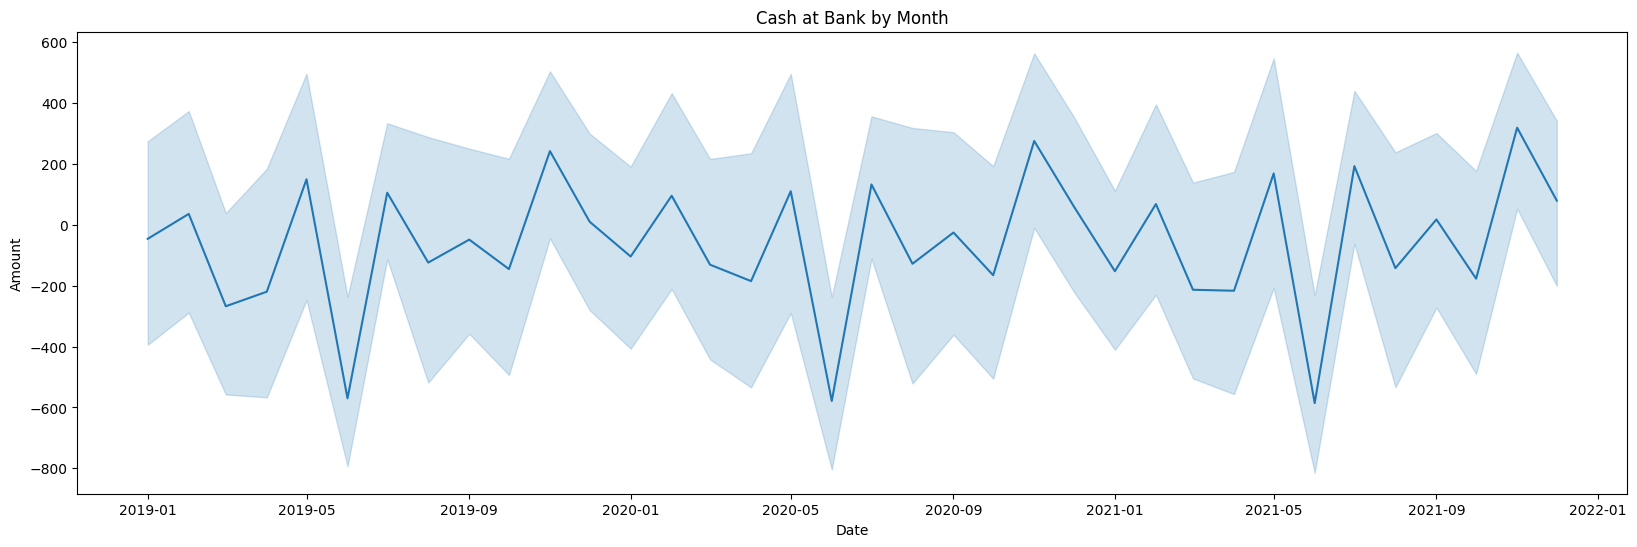

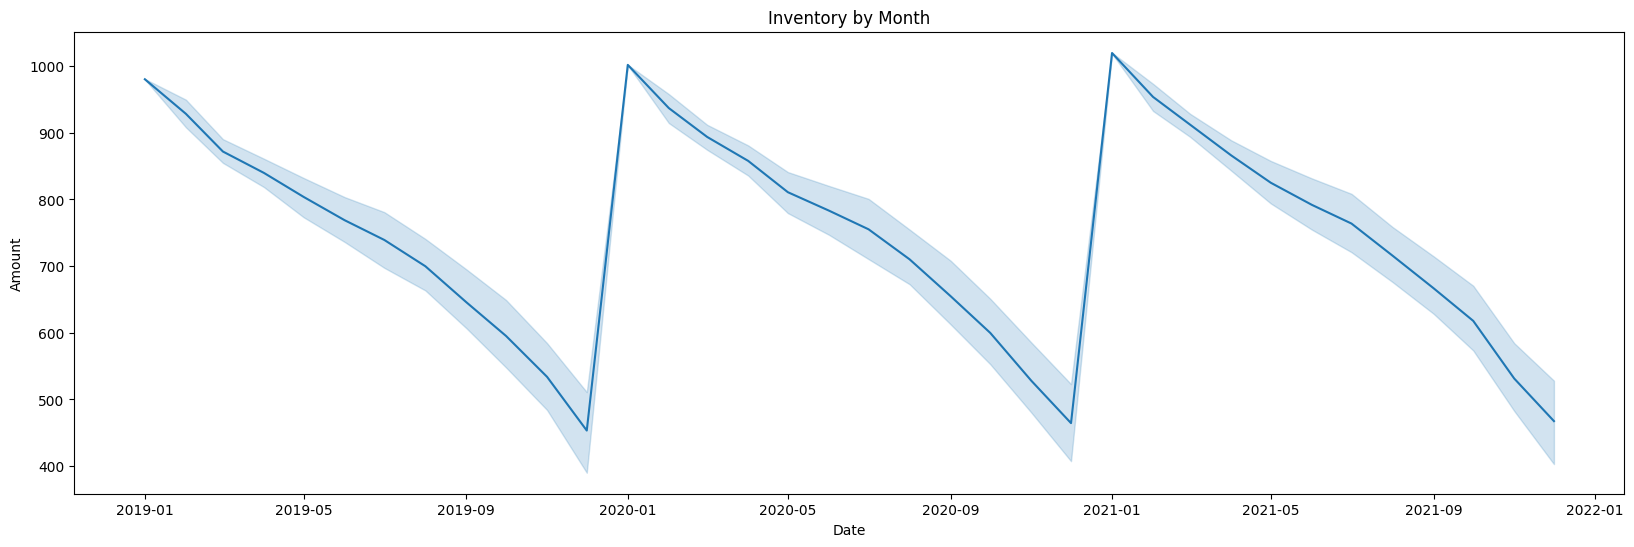

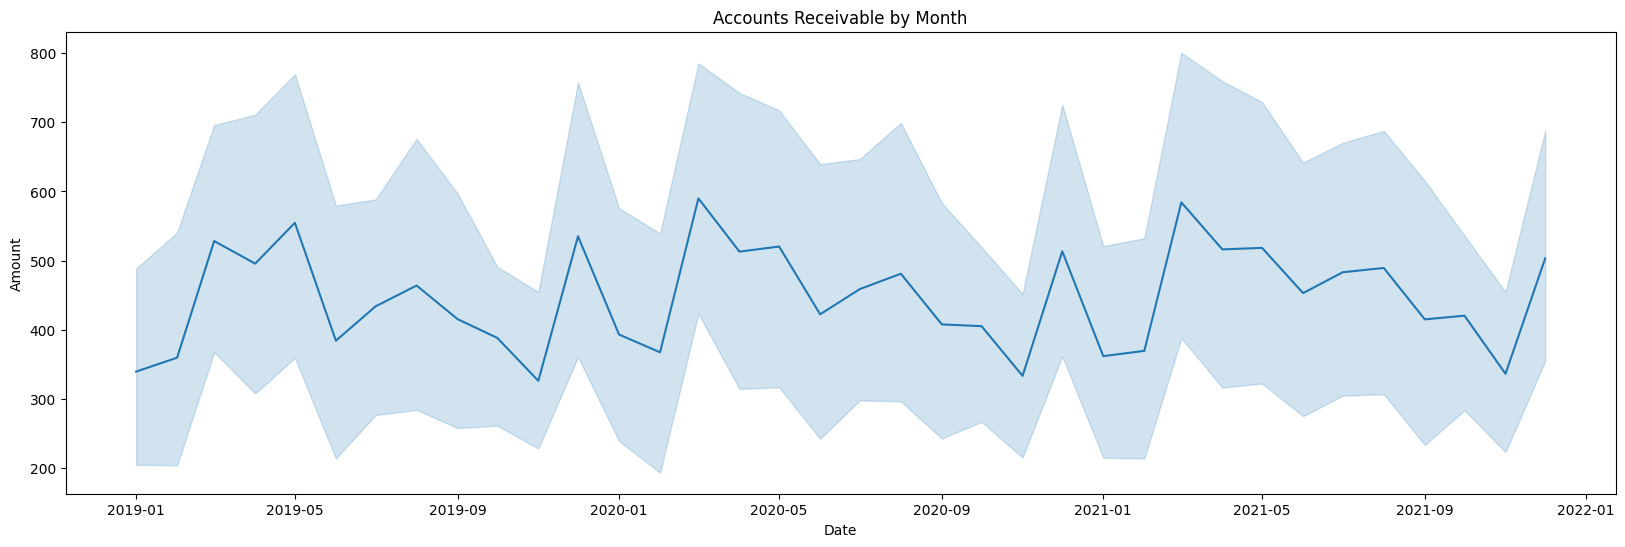

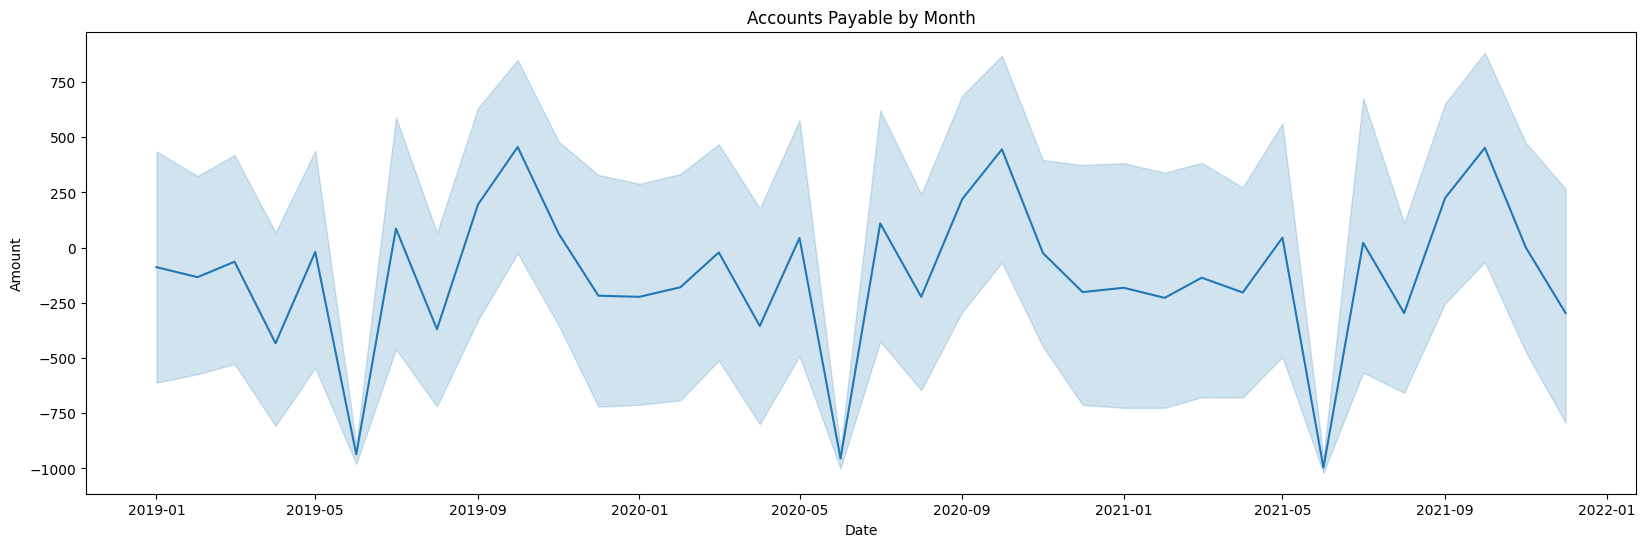

In [62]:
for account in df['Account Description'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', data=df[df['Account Description']==account]).set_title('{} by Month'.format(account))
    plt.show()

In [63]:
df = df[df['Account']!='3000001']

In [64]:
df['Account'].unique()

array(['1000000', '1000001', '1000002', '1000004', '2000000', '2000001',
       '2000002', '2000003', '2000005', '3000000', '3000002', '4000001'],
      dtype=object)

In [65]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Accounts Receivable', 'Accounts Payable'],
      dtype=object)

In [66]:
df['Account'] = 'ACC' + df['Account']

In [67]:
df['AccountVal'] = df['Account'] + df['Account Description']

In [68]:
len(df['AccountVal'].unique())

12

In [69]:
df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)

In [70]:
df.drop(['Date', 'Day', 'Period'], axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          3888 non-null   object 
 1   Month         3888 non-null   object 
 2   Cost Centre   3888 non-null   object 
 3   Account       3888 non-null   object 
 4   Account Type  3888 non-null   object 
 5   Amount        3888 non-null   float64
dtypes: float64(1), object(5)
memory usage: 212.6+ KB


In [73]:
df.to_csv("regression_transform.csv")